# <font color='red'>1. Import Libraries and Check Data<font color='red'> 🧐

In [1]:
# Basic Libraries 📚
# --------------------------------------
import random
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics 📐
# --------------------------------------
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import confusion_matrix, f1_score

# Models 🤖
# --------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Warning indication⚠️
# --------------------------------------
import warnings
warnings.filterwarnings('always') 

**Loading the Dataset**

In [2]:
train = pd.read_csv("/Users/halfdeb/Documents/Deb/Internships/Mentorness/Work/Income Prediction/Train.csv", delimiter = ',')
test = pd.read_csv("/Users/halfdeb/Documents/Deb/Internships/Mentorness/Work/Income Prediction/Test.csv", delimiter = ',')

income_level = ['income_above_limit']
#creating a target coloumn
target_column = train[income_level]

#droping all the unique Identifiers
drop = ['ID']

#final all the features which will be used for training
train_df           = train.drop(drop,axis=1)
test_df            = test.drop(drop,axis=1)


**checking the shape**

In [3]:
print('------------------TRAIN SHAPE--------------------')
print(train_df.shape,'\n')
print('------------------TARGET COLOUMN SHAPE--------------------')
print(target_column.shape,'\n')
print('------------------TEST SHAPE--------------------')
print(test_df.shape)

------------------TRAIN SHAPE--------------------
(209499, 42) 

------------------TARGET COLOUMN SHAPE--------------------
(209499, 1) 

------------------TEST SHAPE--------------------
(89786, 41)


**checking training and testing dataset**

In [4]:
print('**TRAIN**')
display(train_df.head())
print('\n')
print('**TEST**')
display(test_df.head())

**TRAIN**


,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit




**TEST**


,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,...,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
0,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,NaN,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96
1,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,NaN,...,El-Salvador,El-Salvador,?,?,?,?,NaN,NaN,NaN,1177.55
2,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,NaN,...,US,US,?,?,?,?,NaN,NaN,NaN,4898.55
3,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,NaN,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44
4,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,NaN,...,US,US,?,?,?,?,NaN,NaN,NaN,1933.18


# <font color='red'>2. Data Preprocessing<font color='red'> 📝

In [5]:
# Encoding the target column and analyse the class structure.

target_column['income_above_limit'] = target_column['income_above_limit'].map({'Above limit':1,'Below limit':0})

/var/folders/z6/zslr37gj0lv8kf2nsd7clc940000gn/T/ipykernel_3769/1768506901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_column['income_above_limit'] = target_column['income_above_limit'].map({'Above limit':1,'Below limit':0})


In [6]:
target_column['income_above_limit'].value_counts()

0    196501
1     12998
Name: income_above_limit, dtype: int64

**Having a deeper look in the datasets**

The Class Imbalance in the data


Below limit    196501
Above limit     12998
Name: income_above_limit, dtype: int64

--------------------------------------

The Class Imbalance in the data in form of percentage


Below limit    93.795674
Above limit     6.204326
Name: income_above_limit, dtype: float64

--------------------------------------



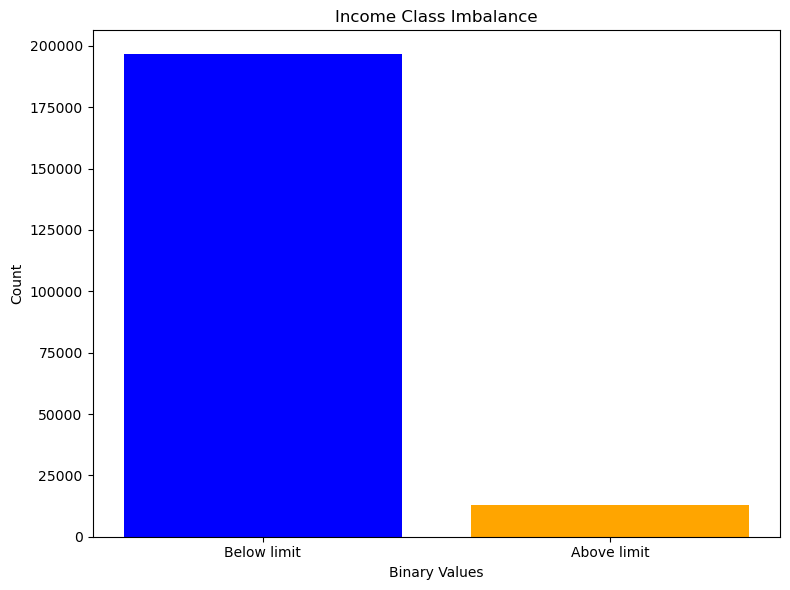

In [7]:
# Class imbalance in the data(in form of numbers as well as percentage)
print('The Class Imbalance in the data')
display(train['income_above_limit'].value_counts())
print('--------------------------------------\n')
print('The Class Imbalance in the data in form of percentage')
display(train['income_above_limit'].value_counts(normalize=True) * 100)
print('--------------------------------------\n')

#Visualising the data imbalance
income_value_counts = train['income_above_limit'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(income_value_counts.index, income_value_counts.values, color=['blue', 'orange'])
plt.xlabel("Binary Values")
plt.ylabel("Count")
plt.title("Income Class Imbalance")
plt.xticks(rotation=0)  # Ensure readable x-axis labels
plt.tight_layout()
plt.show()

**Checking NAN values**

In [8]:
print('------------------TRAIN------------------')
display(train.isnull().sum())
print('\n')
print('------------------TEST------------------')
display(train.isnull().sum())

------------------TRAIN------------------


ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     



------------------TEST------------------


ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

### Observations
- There appear to be so much missing data that has to be addressed for easier data exploration

## Data Cleaning

In [9]:
#This function eill removes all whitespaces in the feature values and '?' values in some columns.

def clean_strip(df):
    df = df.apply(lambda x : x.str.strip() if x.dtype == 'object' else x)
    df = df.replace('?', np.nan)
    return df

train_df = clean_strip(train_df)
test_df = clean_strip(test_df)

#This function will give us name of the features which have more than 70% NaN values
nan_col = []
for col in test_df.columns:
    if test_df[col].isna().sum()/test_df.shape[0]> 0.7:
        nan_col.append(col)

In [10]:
#Coloums which have more than 70% NaN values
print(nan_col)

['education_institute', 'unemployment_reason', 'is_labor_union', 'under_18_family', 'veterans_admin_questionnaire', 'migration_prev_sunbelt', 'old_residence_reg', 'old_residence_state']


- These are coloumns we will definitely drop from the dataset

In [11]:
#Droping the coloums which have more than 70% NaN values
train_df = train_df.drop(nan_col,axis=1)
test_df = test_df.drop(nan_col,axis=1)

print('PRINTING SHAPE OF UPDATED DATASET \n')
print('------------------TRAIN SHAPE--------------------')
print(train_df.shape,'\n')
print('------------------TARGET COLOUMN SHAPE--------------------')
print(target_column.shape,'\n')
print('------------------TEST SHAPE--------------------')
print(test_df.shape)

PRINTING SHAPE OF UPDATED DATASET 

------------------TRAIN SHAPE--------------------
(209499, 34) 

------------------TARGET COLOUMN SHAPE--------------------
(209499, 1) 

------------------TEST SHAPE--------------------
(89786, 33)


## Handling the Missing Values

- Lets handle the missing values of class

In [12]:
#Having look at the values of people who are under 18
print('------------------UNDER 18 YEARS--------------------\n')
display(train_df[train_df["age"] <= 18].head())

#Having look at the values of people who are under 18
print('------------------Above 65 YEARS--------------------\n')
display(train_df[train_df['age']>=65].head())

------------------UNDER 18 YEARS--------------------



,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
3,2,Female,Children,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,94,US,India,India,unchanged,unchanged,unchanged,Same,1380.27,Below limit
11,4,Male,Children,NaN,Never married,Black,All other,Children or Armed Forces,0,0,...,94,US,US,US,unchanged,unchanged,unchanged,Same,1944.73,Below limit
13,16,Female,9th grade,NaN,Never married,White,All other,Children or Armed Forces,0,0,...,94,US,US,US,unchanged,unchanged,unchanged,Same,2684.64,Below limit
16,5,Female,Children,NaN,Never married,White,All other,Children or Armed Forces,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,1340.44,Below limit
29,14,Male,Children,NaN,Never married,White,All other,Children or Armed Forces,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,1652.34,Below limit


------------------Above 65 YEARS--------------------



,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
0,79,Female,High school graduate,NaN,Widowed,White,All other,Not in labor force,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,1779.74,Below limit
1,65,Female,High school graduate,NaN,Widowed,White,All other,Children or Armed Forces,0,0,...,94,US,US,US,unchanged,unchanged,unchanged,Same,2366.75,Below limit
4,70,Male,High school graduate,NaN,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,1580.79,Below limit
8,73,Female,7th and 8th grade,NaN,Married-civilian spouse present,Black,All other,Not in labor force,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,1267.30,Below limit
17,88,Female,High school graduate,NaN,Widowed,White,All other,Not in labor force,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,102.21,Below limit


- if they're younger than 18 and arent classed in any professional class then they've never been employed
- if they're older than 65 and professionally unclass then there is a high probability they're retired.

In [13]:
#Function to update employment status and related fields based on age and NaN valus
def update_employment_related(df):
    df.loc[(df["age"] <= 18) & pd.isna(df["class"]), ["class", "occupation_code", "occupation_code_main"]] = ["Never worked", 0, "None"]
    df.loc[(df["age"] >= 65) & pd.isna(df["class"]), ["class", "occupation_code", "occupation_code_main"]] = ["Retired", 0, "None"]
    return df

#Applying the function to train test DataFrame
train_df = update_employment_related(train_df.copy())
test_df = update_employment_related(test_df.copy())

In [14]:
#checking the whether the changes have been implemented or not
train_df[train_df['age']>=65].head()

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
0,79,Female,High school graduate,Retired,Widowed,White,All other,Not in labor force,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,1779.74,Below limit
1,65,Female,High school graduate,Retired,Widowed,White,All other,Children or Armed Forces,0,0,...,94,US,US,US,unchanged,unchanged,unchanged,Same,2366.75,Below limit
4,70,Male,High school graduate,Retired,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,1580.79,Below limit
8,73,Female,7th and 8th grade,Retired,Married-civilian spouse present,Black,All other,Not in labor force,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,1267.30,Below limit
17,88,Female,High school graduate,Retired,Widowed,White,All other,Not in labor force,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,102.21,Below limit


- looking at the values for the remaining people who's 'class' variable is still unkown

In [15]:
display(train_df[train_df['class'].isnull()].head())

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
12,21,Female,High school graduate,NaN,Never married,White,All other,Not in labor force,0,0,...,95,US,US,US,NaN,NaN,NaN,NaN,1286.84,Below limit
15,36,Female,High school graduate,NaN,Married-civilian spouse present,White,Mexican-American,Children or Armed Forces,0,0,...,94,US,US,US,unchanged,unchanged,unchanged,Same,1705.38,Below limit
27,29,Female,High school graduate,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,...,94,US,US,US,unchanged,unchanged,unchanged,Same,1096.59,Below limit
28,41,Female,Associates degree-academic program,NaN,Never married,White,All other,Not in labor force,0,0,...,95,NaN,Germany,Germany,NaN,NaN,NaN,NaN,1982.02,Below limit
30,45,Female,High school graduate,NaN,Married-civilian spouse present,Black,All other,Children or Armed Forces,0,0,...,94,US,US,US,unchanged,unchanged,unchanged,Same,1131.42,Below limit


- Assuming these null values are just outliers

In [16]:
#Function to update employment status and related fields based on unknown 'class' variable.
def update_employment_related(df):
    df.loc[(df["occupation_code"] == 0) & pd.isna(df["class"]), ["class", "occupation_code", "occupation_code_main"]] = ["Unemployed", 0, "None"]
    return df

#Applying the function to train test DataFrame
train_df = update_employment_related(train_df.copy())
test_df  = update_employment_related(test_df.copy())

- looking at the values for the remaining people who's 'class' variable is still unkown

In [17]:
train_df[train_df["class"].isnull()].head()

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit


- so there are no NaN values remaining in class

                                Missing values  Ratio
migration_code_change_in_msa            106284  50.73
migration_code_move_within_reg          106284  50.73
migration_code_change_in_reg            106284  50.73
residence_1_year_ago                    106284  50.73
country_of_birth_father                   7181   3.43
country_of_birth_mother                   6516   3.11
country_of_birth_own                      3667   1.75
occupation_code_main                       449   0.21
-----------------------------------------------------------------------------------------------------------------



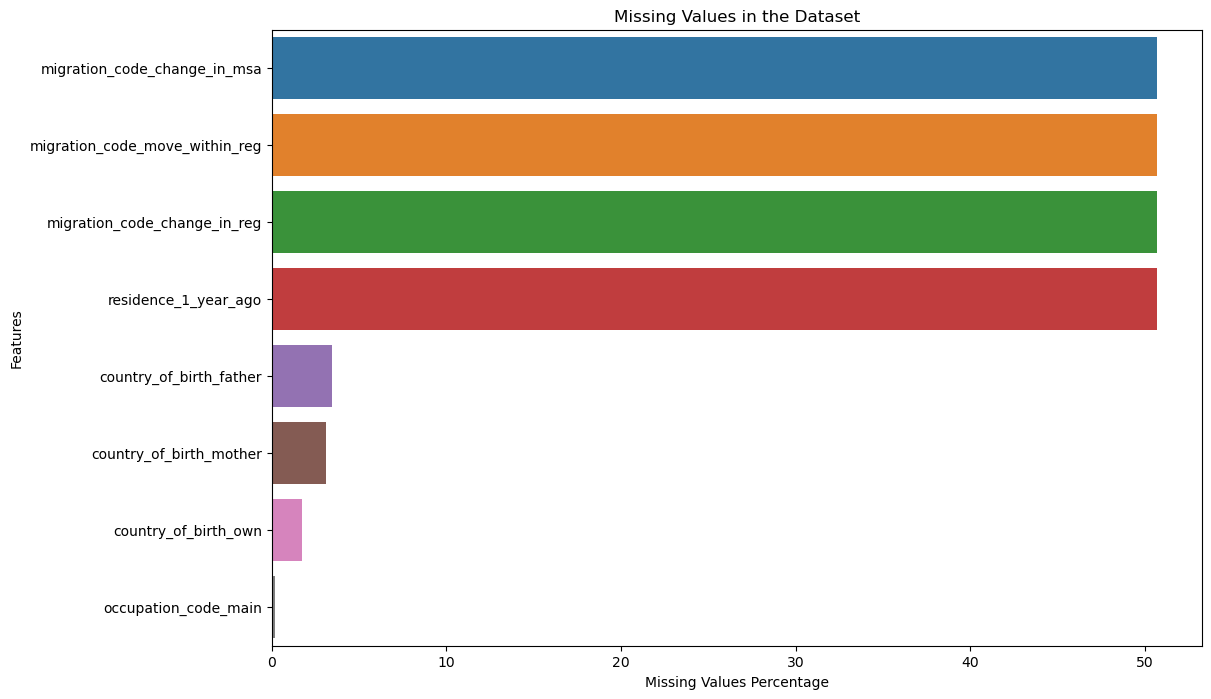

In [18]:
#Have a look at the variables with missing values.
#Function that looks at the missing values and plots them in a bargraph.

def missing_values(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum()>0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_,2)], axis=1,keys=["Missing values", "Ratio"])
    missing_df= pd.DataFrame(missing_df)
    print(missing_df)
    print('-----------------------------------------------------------------------------------------------------------------\n')

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x="Ratio", y=missing_df.index, data=missing_df)
    ax.set(xlabel="Missing Values Percentage", ylabel="Features", title=f"Missing Values in the Dataset")
    plt.show()

missing_values(train_df)

In [19]:
#Create a function to fill missing values in features by utilizing probabilities calculated from other columns.
def impute_based_on_others(df):
    for col in df.columns:
        if df[col].dtype == "object":
            # For categorical variables:
            most_probable_values = df[col].dropna().mode().iloc[0]  
            df[col].fillna(most_probable_values, inplace=True)
        else:
            # For numerical variables:
            imputer = SimpleImputer(strategy="most_frequent")
            df[col] = imputer.fit_transform(df[[col]])
    return df

#Applying the imputation function to the DataFrame
train_df = impute_based_on_others(train_df.copy())
test_df  = impute_based_on_others(test_df.copy())

- final check whether we have any missing value or not

------------------TRAIN------------------


age                               0
gender                            0
education                         0
class                             0
marital_status                    0
race                              0
is_hispanic                       0
employment_commitment             0
employment_stat                   0
wage_per_hour                     0
working_week_per_year             0
industry_code                     0
industry_code_main                0
occupation_code                   0
occupation_code_main              0
total_employed                    0
household_stat                    0
household_summary                 0
vet_benefit                       0
tax_status                        0
gains                             0
losses                            0
stocks_status                     0
citizenship                       0
mig_year                          0
country_of_birth_own              0
country_of_birth_father           0
country_of_birth_mother     



------------------TEST------------------


age                               0
gender                            0
education                         0
class                             0
marital_status                    0
race                              0
is_hispanic                       0
employment_commitment             0
employment_stat                   0
wage_per_hour                     0
working_week_per_year             0
industry_code                     0
industry_code_main                0
occupation_code                   0
occupation_code_main              0
total_employed                    0
household_stat                    0
household_summary                 0
vet_benefit                       0
tax_status                        0
gains                             0
losses                            0
stocks_status                     0
citizenship                       0
mig_year                          0
country_of_birth_own              0
country_of_birth_father           0
country_of_birth_mother     

-----------------------------------------------------------------------------------------------------------------



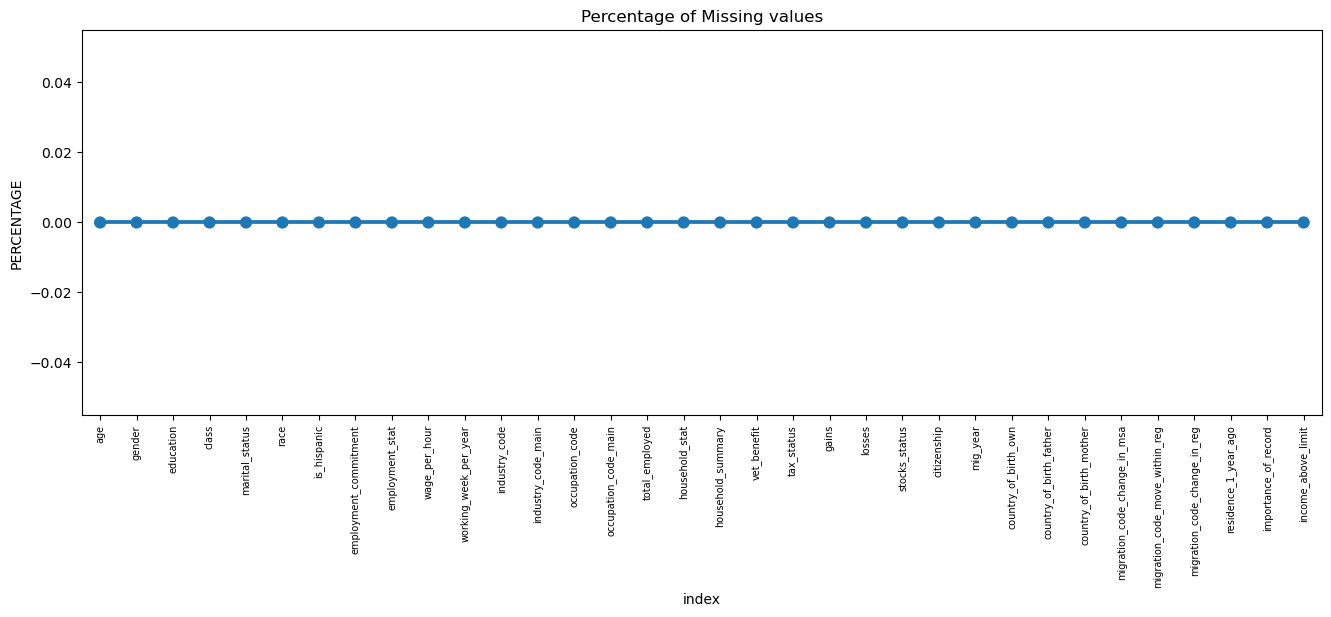

-----------------------------------------------------------------------------------------------------------------



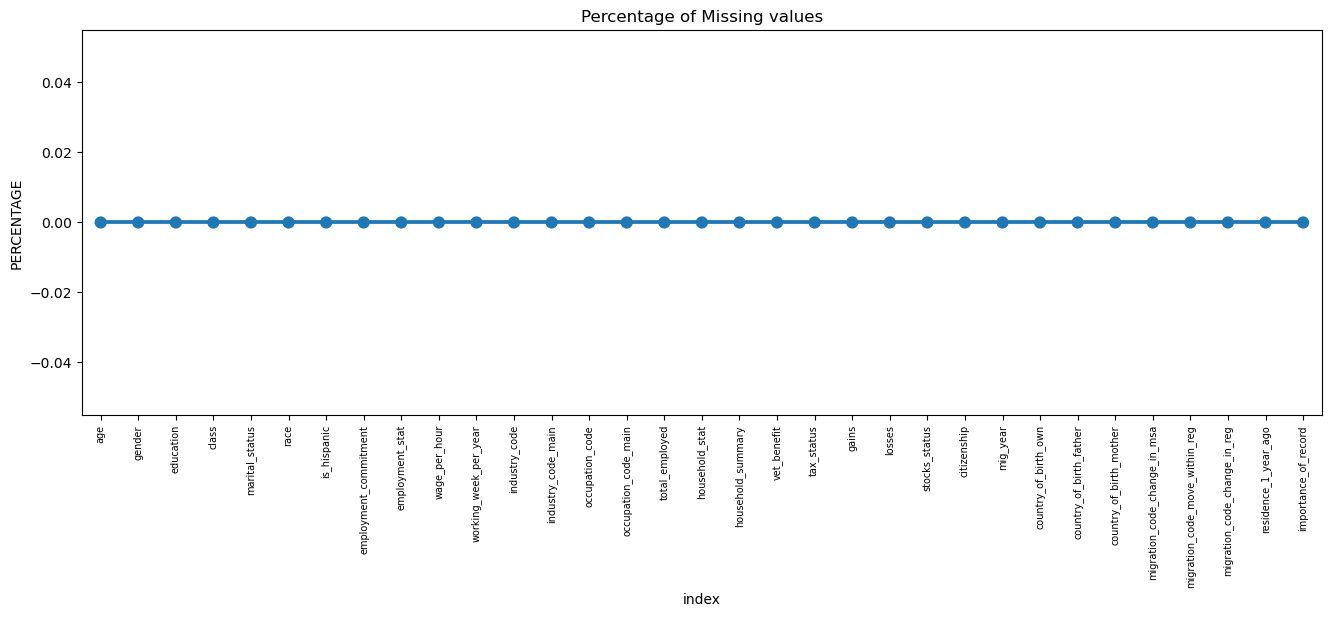

In [20]:
#Checking the number of null value present
print('------------------TRAIN------------------')
display(train_df.isnull().sum())
print('\n')
print('------------------TEST------------------')
display(test_df.isnull().sum())

#Function that looks at the missing values and plots them in a bargraph
def visualize_missing_values(df):
    missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()

    # Plot the percentage of missing values
    plt.figure(figsize=(16, 5))
    ax = sns.pointplot(x='index', y=0, data=missing)
    plt.xticks(rotation=90, fontsize=7)
    plt.title("Percentage of Missing values")
    plt.ylabel("PERCENTAGE")
    plt.show()

print('-----------------------------------------------------------------------------------------------------------------\n')
visualize_missing_values(train_df)
print('-----------------------------------------------------------------------------------------------------------------\n')
visualize_missing_values(test_df)

## Feature Coding

In [21]:
# Gender & Income level encoding.
## Define a mapping dictionary with inclusive representation
gender_mapping = {
    "Male": 0,
    "Female": 1
}

income_mapping = {
    "Below limit": 0,
    "Above limit": 1
}

## Apply the mapping.
train_df['gender'] = train_df['gender'].map(gender_mapping)

test_df['gender'] = test_df['gender'].map(gender_mapping)

train_df['income_above_limit'] = train_df['income_above_limit'].map(income_mapping)

train_df['gender'].unique()

array([1, 0])

In [22]:
# Education level encoding.
## Create a list of all the unique values in the feature.
education_values = ['High school graduate', '5th or 6th grade',
                    'Bachelors degree(BA AB BS)', '9th grade', 'Children',
                    'Some college but no degree', '11th grade', '10th grade',
                    '7th and 8th grade', 'Associates degree-occup /vocational',
                    'Masters degree(MA MS MEng MEd MSW MBA)', '12th grade no diploma',
                    'Associates degree-academic program', 'Less than 1st grade',
                    'Prof school degree (MD DDS DVM LLB JD)',
                    '1st 2nd 3rd or 4th grade', 'Doctorate degree(PhD EdD)']

## Define the mapping rules
education_mapping = {"Children": "Below high school",
                    "1st 2nd 3rd or 4th grade": "Below high school",
                    "5th or 6th grade": "Below high school",
                    "7th and 8th grade": "Below high school",
                    "9th grade": "Below high school",
                    "10th grade": "Below high school",
                    "11th grade": "Below high school",
                    "12th grade no diploma": "Below high school",
                    "High school graduate": "High school",
                    "Some college but no degree": "Undergraduate",
                    "Associates degree-academic program": "Undergraduate",
                    "Associates degree-occup /vocational": "Undergraduate",
                    "Bachelors degree(BA AB BS)": "Undergraduate",
                    "Masters degree(MA MS MEng MEd MSW MBA)": "Postgraduate",
                    "Prof school degree (MD DDS DVM LLB JD)": "Postgraduate",
                    "Doctorate degree(PhD EdD)": "Postgraduate",
}

## Apply the mapping.
train_df['education'] = train_df['education'].map(education_mapping)
test_df['education'] = test_df['education'].map(education_mapping)

In [23]:
# Marital status encoding.
## Create a list of all the unique values in the feature.

marriage_status_values = ["Widowed", "Never married", "Married-civilian spouse present",
                        "Divorced", "Married-spouse absent","Separated","Married-A F spouse present"]

## Define the mapping rules.
marriage_mapping = {"Married-civilian spouse present": "Married",
                    "Married-spouse absent": "Married",
                    "Married-A F spouse present": "Married",
                    "Widowed": "Single", "Divorced": "Single",
                    "Separated": "Single", "Never married": "Single",
}

## Apply the mapping.
train_df['marital_status'] = train_df['marital_status'].map(marriage_mapping)
test_df['marital_status'] = test_df['marital_status'].map(marriage_mapping)

## Further map to binary values.
train_df["marital_status"] = train_df["marital_status"].map({"Married": 0, "Single": 1})
test_df['marital_status'] = test_df['marital_status'].map({"Married": 0, "Single": 1})

In [24]:
# Citizenship status encoding.
## Create a list of all the unique values in the feature.
citizenship_values = ["Native", "Foreign born- Not a citizen of U S", 
                    "Foreign born- U S citizen by naturalization",
                    "Native- Born abroad of American Parent(s)",
                    "Native- Born in Puerto Rico or U S Outlying",
]

## Define the mapping rules
citizenship_mapping = {"Native": "Citizen",
                    "Native- Born abroad of American Parent(s)": "Citizen",
                    "Native- Born in Puerto Rico or U S Outlying": "Citizen",
                    "Foreign born- U S citizen by naturalization": "Citizen",
                    "Foreign born- Not a citizen of U S": "Non-citizen"
}

## Apply the mapping.
train_df['citizenship'] = train_df['citizenship'].map(citizenship_mapping)
test_df['citizenship'] = test_df['citizenship'].map(citizenship_mapping)

## Further map to binary values.
train_df["citizenship"] = train_df["citizenship"].map({"Citizen": 0, "Non-citizen": 1})
test_df['citizenship'] = test_df['citizenship'].map({"Citizen": 0, "Non-citizen": 1})

In [25]:
# Hourly wage encoding.
## Define bin edges
bin_edges = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

## Create labels for the bins
bin_labels = ["0-1000", "1001-2000", "2001-3000", "3001-4000", "4001-5000",
            "5001-6000", "6001-7000", "7001-8000", "8001-9000", "9001-9999"]

## Apply the binning using pd.cut()
train_df["wage_per_hour"] = pd.cut(train_df["wage_per_hour"], bins=bin_edges, labels=bin_labels)
test_df["wage_per_hour"] = pd.cut(test_df["wage_per_hour"], bins=bin_edges, labels=bin_labels)

train_df["wage_per_hour"].value_counts()

0-1000       7914
1001-2000    3405
2001-3000     424
3001-4000      48
4001-5000      20
6001-7000      12
5001-6000      11
7001-8000       9
9001-9999       7
8001-9000       6
Name: wage_per_hour, dtype: int64

In [26]:
# Investment/capital market gains encoding.
## Define bin edges
bin_edges = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

## Create labels for the bins
bin_labels = ["0-10000", "10001-20000", "20001-30000", "30001-40000", "40001-50000",
            "50001-60000", "60001-70000", "70001-80000", "80001-90000", "90001-99999"]

## Apply the binning using pd.cut()
train_df["gains"] = pd.cut(train_df["gains"], bins=bin_edges, labels=bin_labels)
test_df["gains"] = pd.cut(test_df["gains"], bins=bin_edges, labels=bin_labels)

train_df["gains"].value_counts()

0-10000        5866
10001-20000    1299
90001-99999     409
20001-30000     245
30001-40000       8
40001-50000       3
50001-60000       0
60001-70000       0
70001-80000       0
80001-90000       0
Name: gains, dtype: int64

In [27]:
# Investment/capital market gains encoding.
## Define bin edges
bin_edges = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

## Create labels for the bins
bin_labels = ["0-10000", "10001-20000", "20001-30000", "30001-40000", "40001-50000",
            "50001-60000", "60001-70000", "70001-80000", "80001-90000", "90001-99999"]

## Apply the binning using pd.cut()
train_df["stocks_status"] = pd.cut(train_df["stocks_status"], bins=bin_edges, labels=bin_labels)
test_df["stocks_status"] = pd.cut(test_df["stocks_status"], bins=bin_edges, labels=bin_labels)

train_df["stocks_status"].value_counts()

0-10000        21323
10001-20000      432
20001-30000      136
40001-50000       53
30001-40000       32
90001-99999       23
50001-60000       22
60001-70000        5
70001-80000        4
80001-90000        2
Name: stocks_status, dtype: int64

In [28]:
# Investment/capital market gains encoding.
## Define bin edges
bin_edges = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

## Create labels for the bins
bin_labels = ["0-1000", "1001-2000", "2001-3000", "3001-4000", "4001-5000",
            "5001-6000", "6001-7000", "7001-8000", "8001-9000", "9001-9999"]

## Apply the binning using pd.cut()
train_df["losses"] = pd.cut(train_df["losses"], bins=bin_edges, labels=bin_labels)
test_df["losses"] = pd.cut(test_df["losses"], bins=bin_edges, labels=bin_labels)

train_df["losses"].value_counts()

1001-2000    2902
2001-3000     966
0-1000        111
3001-4000      46
4001-5000      37
5001-6000       0
6001-7000       0
7001-8000       0
8001-9000       0
9001-9999       0
Name: losses, dtype: int64

In [29]:
# Final Coding Procedure.

## Create a list of all the unique values in the feature
categorical_columns = ['class', 'race', 'education',
                    'is_hispanic', 'employment_commitment', 'working_week_per_year',
                    'industry_code_main', 'occupation_code_main', 'household_stat', 'stocks_status',
                    'household_summary', 'tax_status', 'citizenship', 'gains', 'losses',
                    'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother',
                    'migration_code_change_in_msa', "wage_per_hour",
                    'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago']

## Define function that codes the values into categorical codes

def consistent_coding(dataframes, categorical_columns):
    """Applies consistent category coding across multiple DataFrames."""

    # Create a dictionary to store global category mappings
    category_codes = {}

    for df in dataframes:
        for col in categorical_columns:
            if col not in category_codes:
                # Create mapping for new categories
                category_codes[col] = {
                    value: i for i, value in enumerate(df[col].dropna().unique())
                }

            # Apply mapping to DataFrame
            df[col] = df[col].astype('category')
            df[col] = df[col].cat.set_categories(list(category_codes[col].keys()))
            df[col] = df[col].cat.codes  # Assign codes based on global mapping
    
    df_category_codes = pd.DataFrame(category_codes)
    return dataframes


## Apply consistent coding to training & testing data.
consistent_coded_dfs = consistent_coding([train_df, test_df], categorical_columns)
train_df_coded, test_df_coded = consistent_coded_dfs  # Assign back to original DataFrames

# <font color='red'>3. EDA<font color='red'> 📊

- Age wise income imbalance

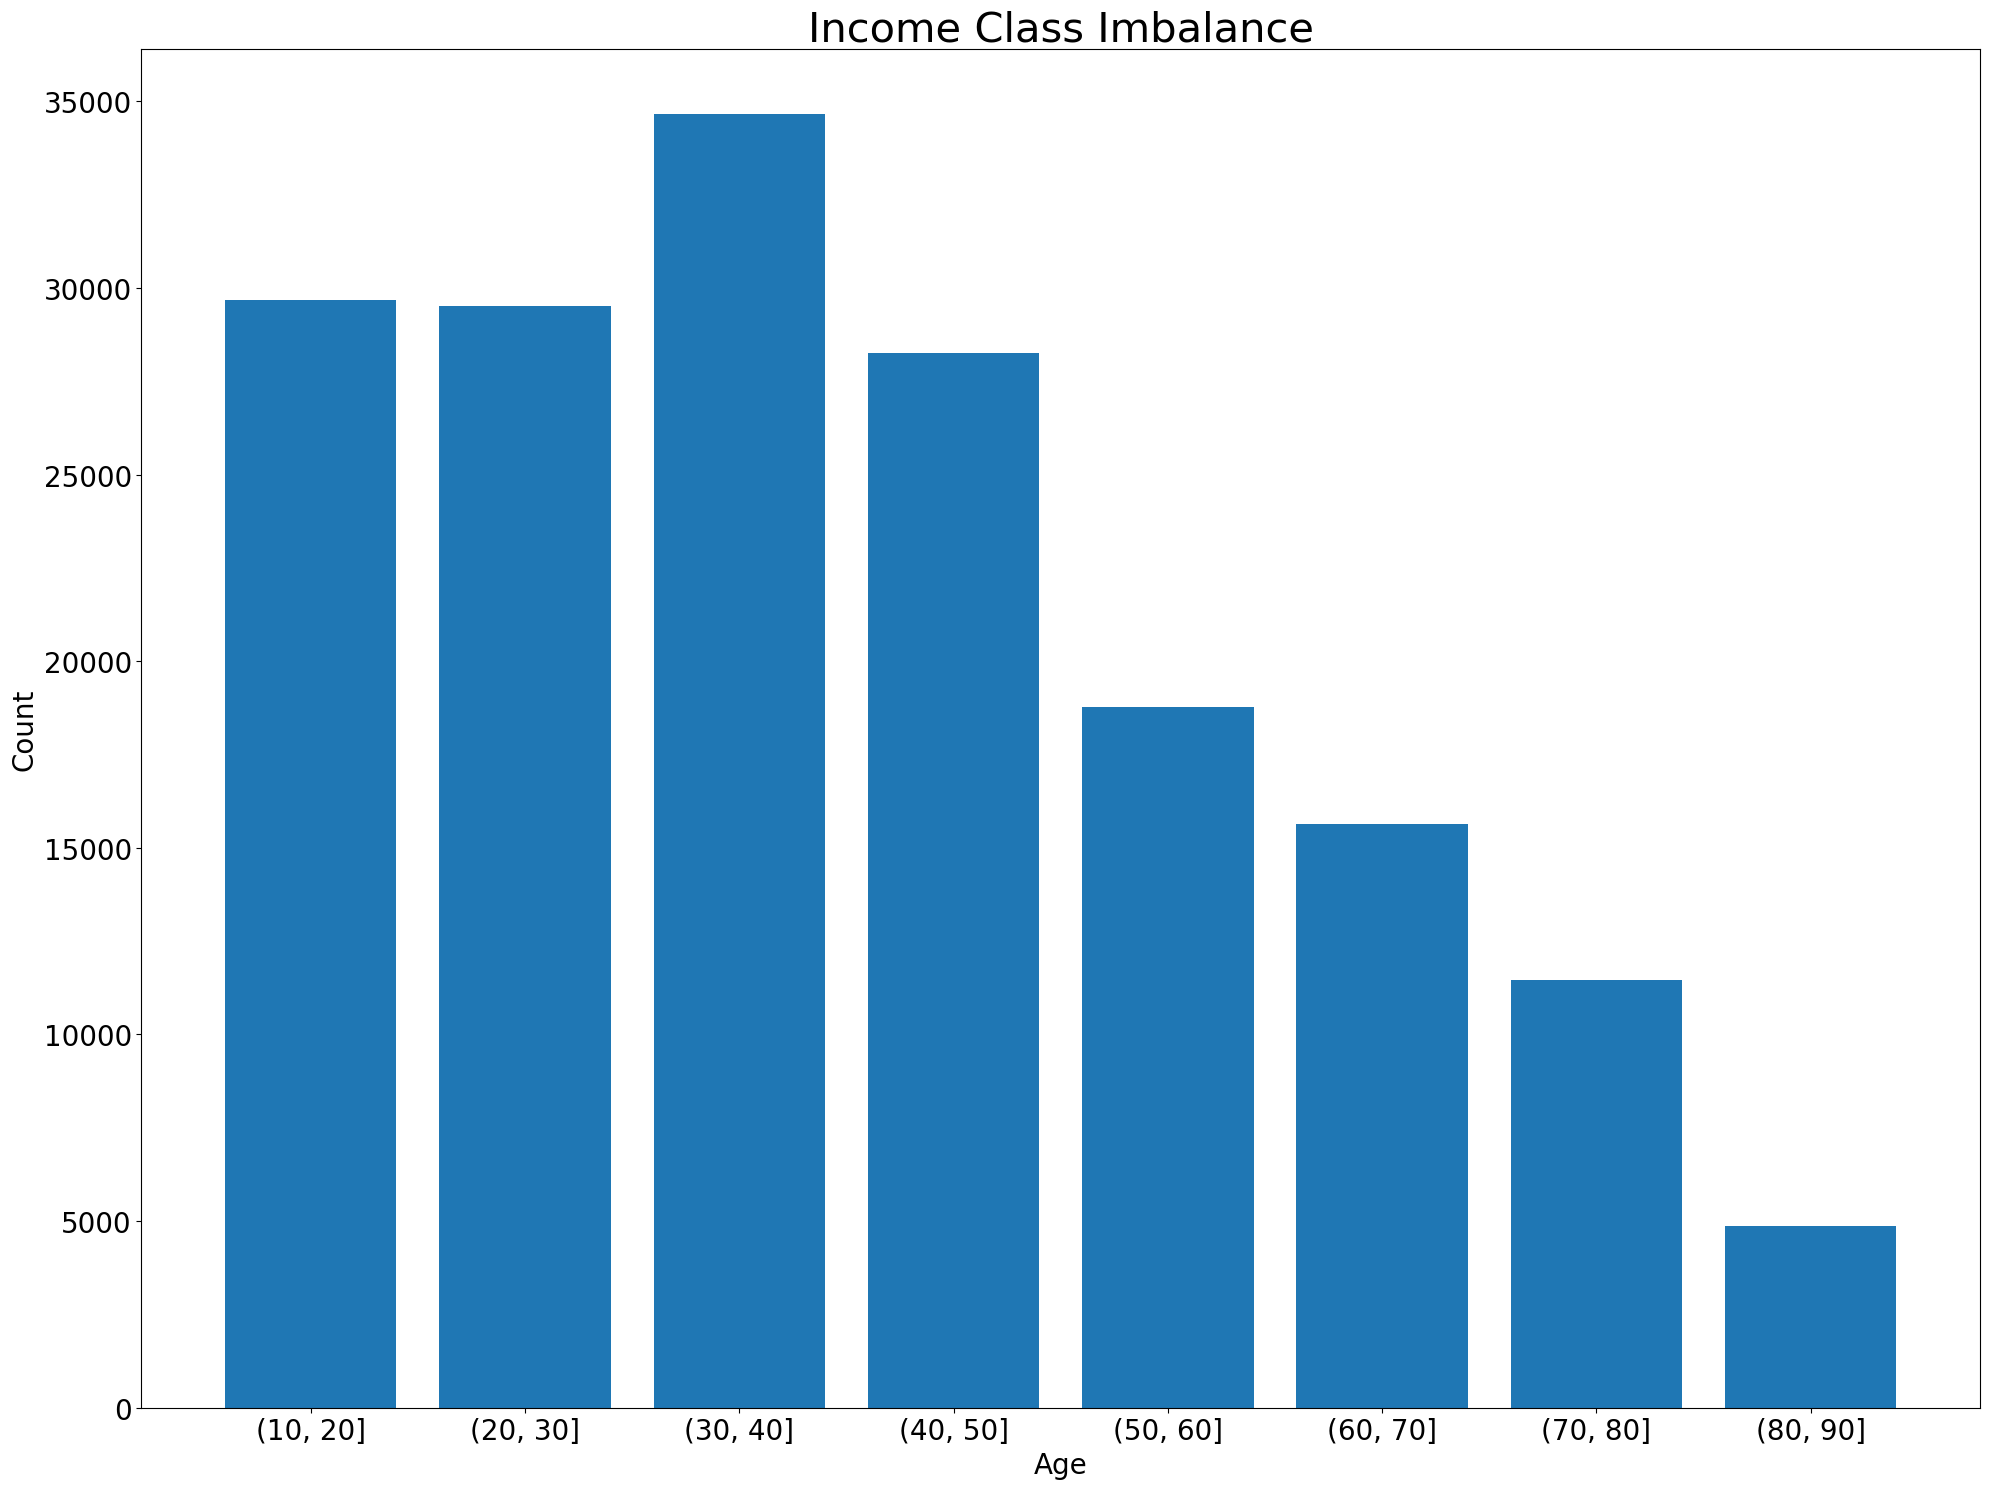

In [30]:
# Number of people in different age brackets.
# Group by age ranges (10-year intervals) and count occurrences of 'value'
grouped_age_data = train_df_coded.groupby(pd.cut(train['age'], range(10, 100, 10)))['age'].size()

## Convet the index values into string values.

grouped_age_data.index = grouped_age_data.index.astype(str)

## Bar chart showing the class imbalance.
plt.figure(figsize=(20,15))  # Adjust figure size as needed
plt.yticks(fontsize=20)
plt.bar(grouped_age_data.index, grouped_age_data.values)
plt.xlabel("Age", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Income Class Imbalance", fontsize=30)
plt.xticks(rotation=0, fontsize=20)  # Ensure readable x-axis labels
plt.tight_layout()
plt.show()

**Observation**
- The barplot above shows us that the data is right skewed
- The population sampled comprises of younger aged participants i.e 10-40.

- Gender wise imbalance 

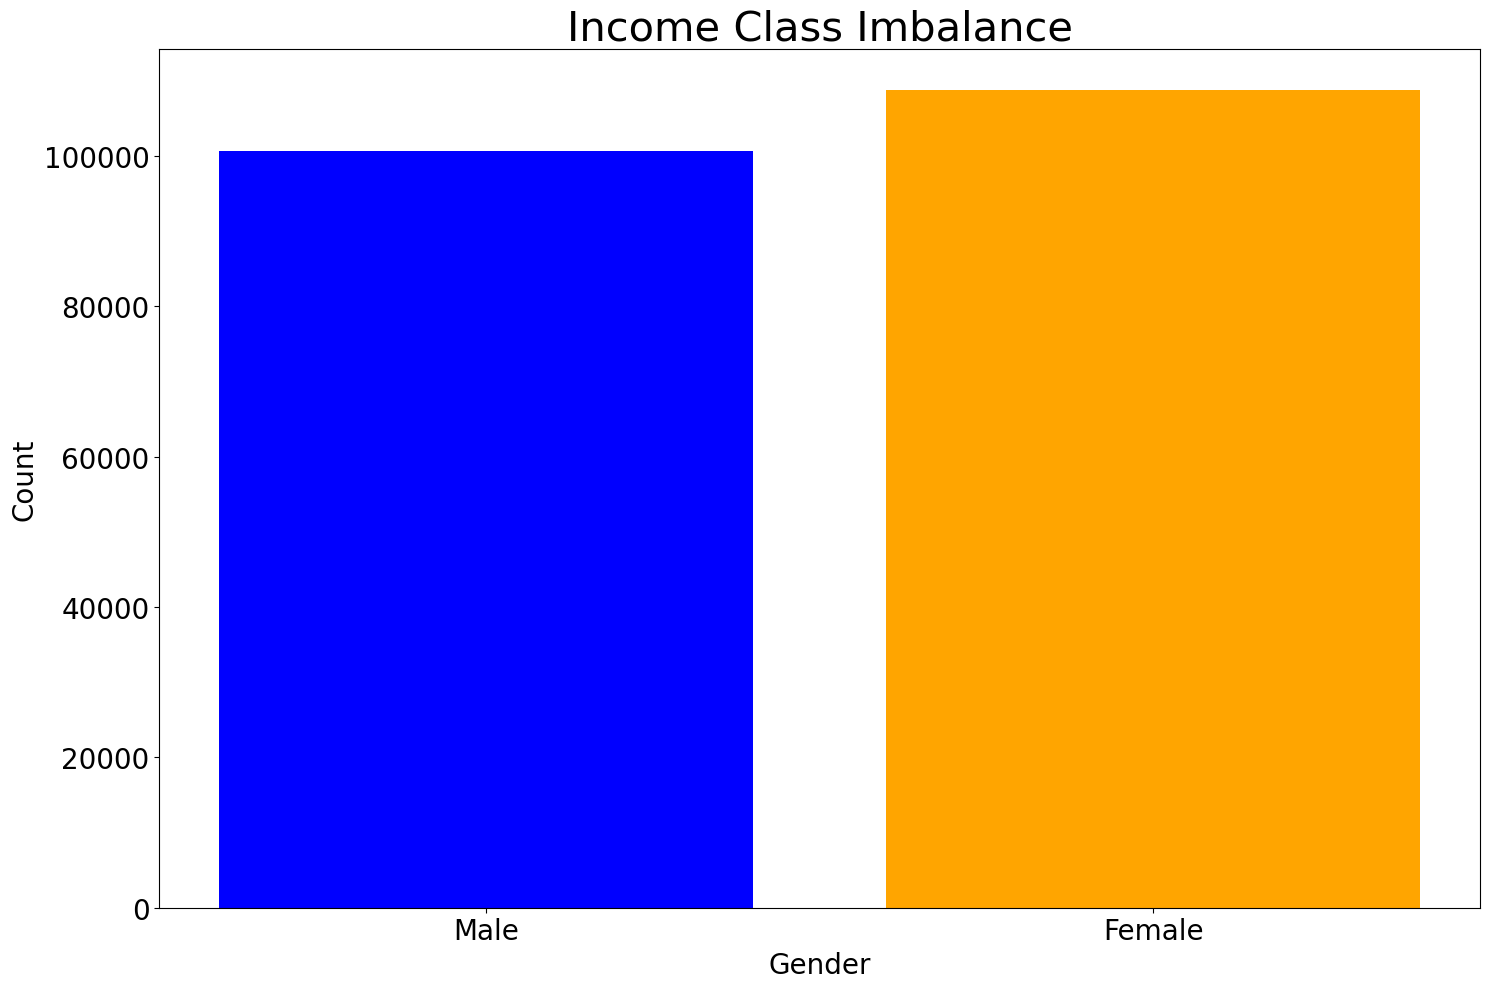

In [31]:
# Group by the labeled gender
grouped_gender = train_df_coded.groupby("gender").size()

# Replace binary values with labels
grouped_gender.index = grouped_gender.index.map({0: "Male", 1: "Female"})

## Bar chart showing the class imbalance.
plt.figure(figsize=(15,10))  # Adjust figure size as needed
plt.yticks(fontsize=20)
plt.bar(grouped_gender.index, grouped_gender.values, color=['blue', 'orange'])
plt.xlabel("Gender", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Income Class Imbalance", fontsize=30)
plt.xticks(rotation=0, fontsize=20)  # Ensure readable x-axis labels
plt.tight_layout()
plt.show()

**Observation**
- There were more female participants compared to male participants.

 - Probability of earning above $50,000 at with different genders.

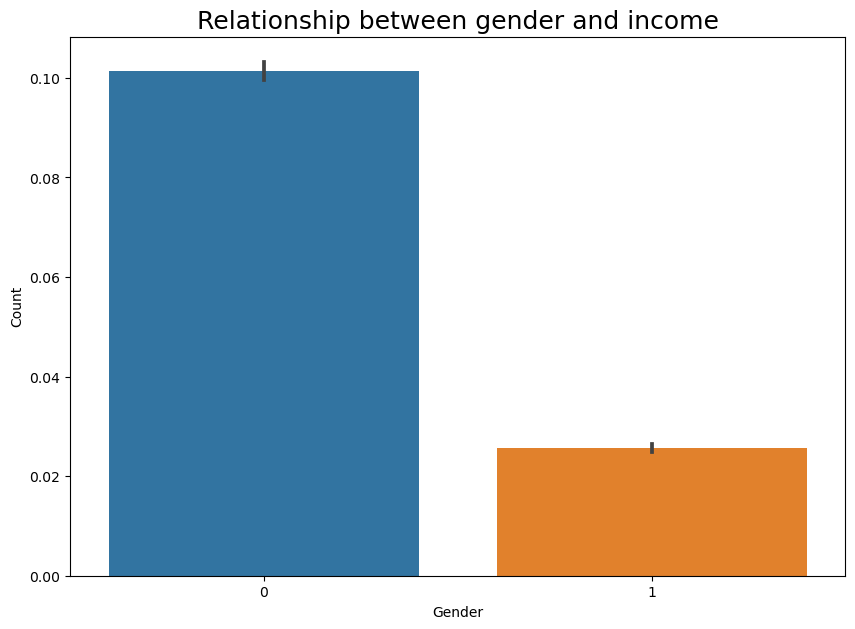

In [32]:
g = sns.barplot(x="gender",y="income_above_limit",data=train_df_coded)
g = g.set_ylabel("Income >50K Probability")
g.figure.set_size_inches(10, 7)
plt.xticks(fontsize=8)

## Edit the labels
plt.yticks(fontsize=10)
plt.title("Income Class Imbalance", fontsize=30)
plt.xlabel("Gender", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.title("Relationship between gender and income", fontsize=18)
plt.show()

**Observations**
- The highest probabilities of earning incomes above 50K are significantly possessed more by men

- Group by the labeled marital status

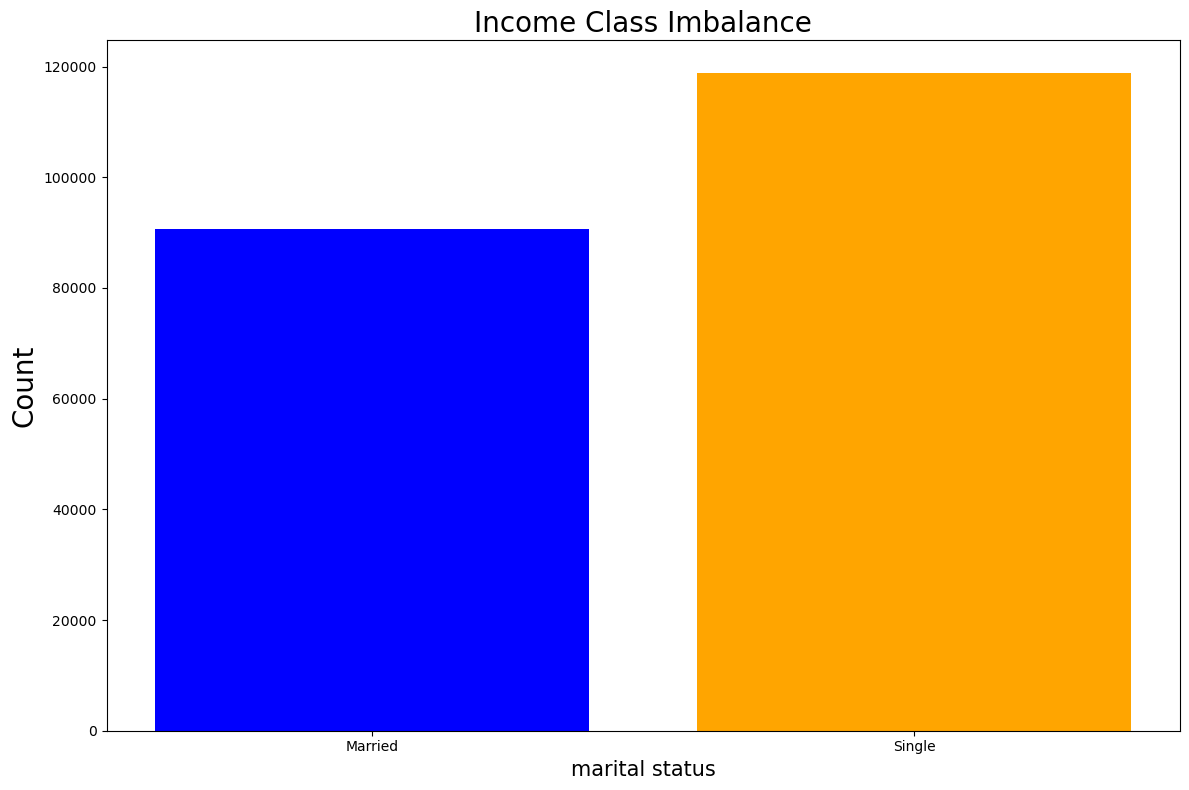

In [33]:
# Group by the labeled marital status
grouped_marital = train_df_coded.groupby("marital_status").size()

# Replace binary values with labels
grouped_marital.index = grouped_marital.index.map({0: "Married", 1: "Single"})

## Bar chart showing the class imbalance.
plt.figure(figsize=(12,8))  # Adjust figure size as needed
plt.yticks(fontsize=10)
plt.bar(grouped_marital.index, grouped_marital.values, color=['blue', 'orange'])
plt.xlabel("marital status", fontsize=15)
plt.ylabel("Count", fontsize=20)
plt.title("Income Class Imbalance", fontsize=20)
plt.xticks(rotation=0, fontsize=10)  # Ensure readable x-axis labels
plt.tight_layout()
plt.show()

**Observations**
- There were slightly more single participants compared to married participants.

- Probability of earning above $50,000 at with different genders.

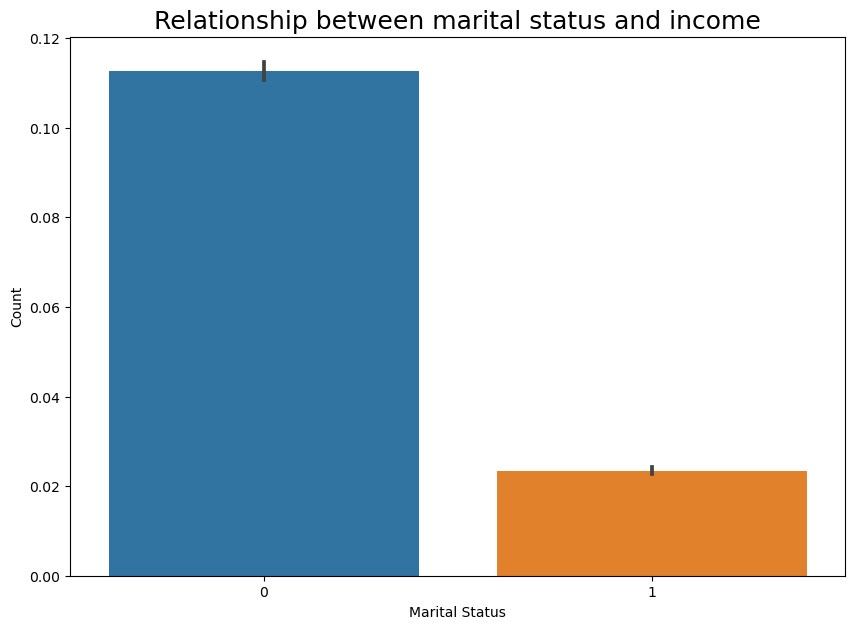

In [34]:
g = sns.barplot(x="marital_status",y="income_above_limit",data=train_df_coded)
g = g.set_ylabel("Income >50K Probability")
g.figure.set_size_inches(10, 7)
plt.xticks(fontsize=8)

## Edit the labels
plt.yticks(fontsize=10)
plt.title("Income Class Imbalance", fontsize=30)
plt.xlabel("Marital Status", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.title("Relationship between marital status and income", fontsize=18)
plt.show()

**Observations**
- The highest probabilities of earning incomes above 50K are significantly possessed more by married participants.

- Workclass vs Income

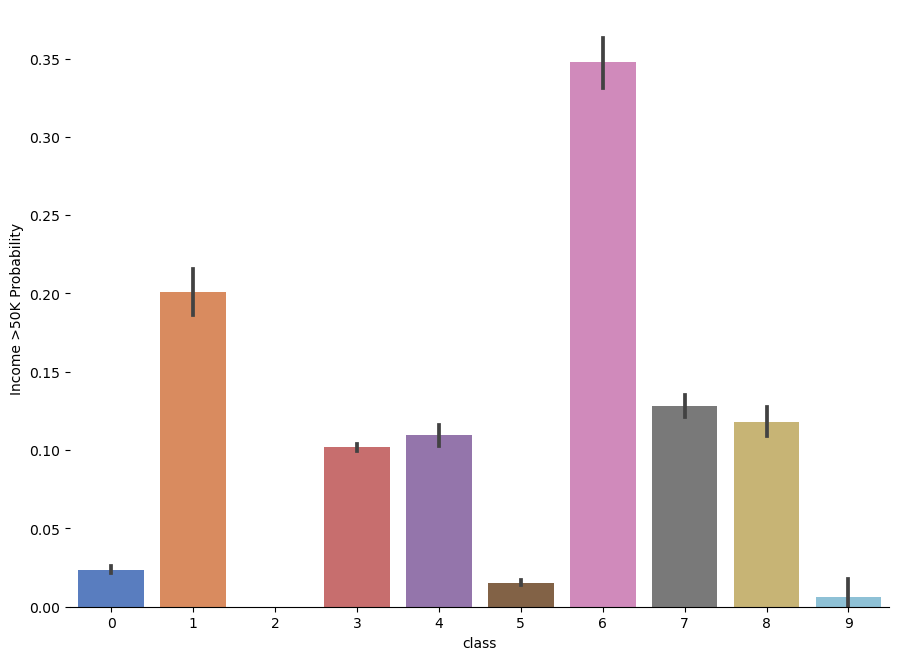

In [35]:
g = sns.catplot(x="class",y="income_above_limit",data=train_df_coded,kind="bar",
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.figure.set_size_inches(10, 7)
plt.show()

**Observations**
- The highest probabilities of earning incomes above 50K are significantly possessed more by self employed.
- Even though a higher number Private classed participants were sampled.

# <font color='red'>4. Modelling<font color='red'> 🤖

In [36]:
# Separate features and target variable
X = train_df_coded.drop("income_above_limit", axis=1)
y = train_df_coded["income_above_limit"]

# Oversample minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_oversampled, y_train_oversampled, test_size=0.1, random_state=42)

# Create a Random Forest classifier with hyperparameter tuning
rf_clf_ov = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
rf_clf_ov.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_clf_ov.predict(X_test)

- model evaluation

In [37]:
#confusion matrix
print('Confusion Matrix: \n')
print(confusion_matrix(y_pred, y_test))
print('\n')

print('--------------------------------------\n')

#f1 Score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Confusion Matrix: 

[[19171   541]
 [  651 18938]]


--------------------------------------

F1-score: 0.9694890959352924


# <font color='red'>5. Prediction<font color='red'> 💻

In [38]:
predictions = rf_clf_ov.predict(test_df_coded)

# Add the predictions as a new column to df_test
test_predictions = test.copy()
test_predictions['income_above_limit'] = predictions

# Merge the 'test_df' and 'test_predictions' based on the common column 'ID'
merged_df = pd.DataFrame(data=predictions, columns=['income_above_limit']).merge(test[['ID']], left_index=True, right_index=True)

# Now 'merged_df' contains the 'ID' column in addition to the data from 'test_predictions'
results = merged_df[['ID', 'income_above_limit']]
results.head()

,ID,income_above_limit
0,ID_TZ209499,0
1,ID_TZ209500,0
2,ID_TZ209501,1
3,ID_TZ209502,0
4,ID_TZ209503,0


In [39]:
#results.to_csv('results.csv', index=False)

In [40]:
X

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record
0,79,1,0,0,1,0,0,0,0,-1,...,0,95,0,0,0,0,0,0,0,1779.74
1,65,1,0,0,1,0,0,1,0,-1,...,0,94,0,0,0,0,0,0,0,2366.75
2,21,0,1,1,1,1,0,1,0,0,...,0,94,0,0,0,0,0,0,0,1693.42
3,2,1,1,2,1,2,0,1,0,-1,...,0,94,0,1,1,0,0,0,0,1380.27
4,70,0,0,0,0,0,0,0,0,-1,...,0,95,0,0,0,0,0,0,0,1580.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,16,1,1,2,1,0,0,0,0,-1,...,0,95,0,0,0,0,0,0,0,2170.60
209495,78,0,2,0,0,0,0,0,0,-1,...,0,95,0,0,8,0,0,0,0,1029.57
209496,8,1,1,2,1,0,0,1,0,-1,...,0,95,0,0,0,0,0,0,0,791.61
209497,26,1,2,3,0,0,0,1,0,0,...,0,94,0,0,0,0,0,0,0,3530.26


In [41]:
X.shape

(209499, 33)